# Part 1

Consider the following corporate sectors:
    
Telecommunications, Banking, Retail/Supply Chain, Healthcare, Insurance.

For each domain, determine one or more random variables which follow the Binomial, Poisson, and Exponential distribution (determine one RV for each distribution). Briefly explain why your RV follows the given distribution.


##    1) Poisson Distribution:
The Poisson distribution is used to model the number of events occurring within a given time interval.<br>
The formula for the Poisson probability mass function is 
p(x:λ) = (λ^x.e^-λ) / x!   for x = 0,1,2,3,..... <br>
λ is the parameter which gives the average number of event

#### Telecom Sector:
Telecommunication sector uses possion distribution to calculate the probability density function number of telephone calls made per unit time in a particlar area more specifically in cells in cellular communication to plan for bandwidth requirement and tower installation. 

#### Retail/Supply Chain:
Use the Poisson formula to evaluate whether it is financially viable to keep a store open 24 hours a day. Calculate the average number of sales made by the store during the overnight shift. Using the distribution formula then, calculate the probable lowest number of sales that might be made during the overnight shift. Finally, determine whether that lowest probable sales figure represents sufficient revenue to cover all the costs (wages and salaries, electricity, etc.) of keeping the store open during that time period, while also providing a reasonable profit.

#### Banking Sector:
Possion distribution may be used in banking sector to calculate the probability density function for the number of bankruptcies that filed in a month. Then finding the probable maximum bankruptcies based on this keeping sufficient buffer and selecting their customers
Or the number of services completed per unit time at a bank counter or any other service facility.

#### Insurance Sector:
Determine the average number of claims that occur each year and that are covered by the company’s insurance. Then do a Poisson probability calculation to determine the maximum and minimum numbers of claims that might reasonably be filed during any one year.
Review the cost of your insurance premium and the coverage it provides. Consider whether perhaps your premium amount is sufficient enough,for paying the maximum probable coverage amount.

#### Health Care:
In health care sector poisson distribution can be used for efficient planing of doctors availability based on the ffollowing random variable.<br> 
    The number of patient arrivals in a given hour at a walk-in clinic. <br>
    The number of beds occupied in a large hospital.



## 2) Binomial Distribution:
A binomial distribution can be thought of as simply the probability of a SUCCESS or FAILURE outcome in an experiment or survey that is repeated multiple times. The binomial is a type of distribution that has two possible outcomes (the prefix “bi” means two, or twice). For example, a coin toss has only two possible outcomes: heads or tails and taking a test could have two possible outcomes: pass or fail.<br>

##### Examples

1) In manufaturing and supply chain binomial distribution can be used to draw robability distribution of random varible following binomial distribution to estimate the used and unused raw material.
    
2) In helthcare random variable following binomial distribution can be used, suppose that 80% of adults with allergies report symptomatic relief with a specific medication. If the medication is given to 10 new patients with allergies, what is the probability that it is effective in exactly seven can be  modeled  using binomial distribution.
    
3) Calculating the probability distribution of the TRP of a channel show by taking survey from the household whether they watched the show or not, can be modelled using binomial distribution.
    




## 3)Exponential Distribution:
The exponential distribution is often concerned with the amount of time until some specific event occurs. The probability density function (pdf) of an exponential distribution f(x:λ) is 

 \begin{cases}\lambda e^{-\lambda x}&x\geq 0,\\0&x<0.\end{cases}
Here λ > 0 is the parameter of the distribution, often called the rate parameter. The distribution is supported on the interval (0, ∞). If a random variable X has this distribution, we write X ~ Exp(λ).

##### Examples

1) Exponential distribution may be used to find the duration in minutes, that how long duration telephone calls are made, based on distance. As the distance increases duration o call decreases. On the bases of this analysis telco may set the price of calls.

2) Exponential distribution may be used to find the probability distribution of amount of money customers spend in one trip to the supermarket. There are more people who spend small amounts of money and fewer people who spend large amounts of money followinfg exponential distribution.


# Part 2:

In the datetime analysis file (uploaded on drive), try to find out the reason as to why there is an average 10 hour time between giving of orders and approving them. You need to create your own notebook and execute your own method of analysis with explanations.

In [2]:
# Code
# Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Reading CSV file "Must be in working directory"
orderdf = pd.read_csv("Orders.Data.csv")
# Trimming Dataframe to only required columns 
orderdf_trim = orderdf[['order_purchase_timestamp','order_approved_at']]
# Renaming Column for easy understanding
orderdf_trim = orderdf_trim.rename(columns = {'order_purchase_timestamp':'order_time','order_approved_at':'approve_time'})
# Changing Data types to Datetime for further analysis
orderdf_trim['order_time']   = pd.to_datetime(orderdf_trim['order_time'])
orderdf_trim['approve_time'] = pd.to_datetime(orderdf_trim['approve_time'])

orderdf_trim.dtypes



order_time      datetime64[ns]
approve_time    datetime64[ns]
dtype: object

In [4]:
# Data Look like
orderdf_trim.head(5)

,order_time,approve_time
0,2017-10-02 10:56:33,2017-10-02 11:07:15
1,2018-07-24 20:41:37,2018-07-26 03:24:27
2,2018-08-08 08:38:49,2018-08-08 08:55:23
3,2017-11-18 19:28:06,2017-11-18 19:45:59
4,2018-02-13 21:18:39,2018-02-13 22:20:29


In [5]:
# Taking difference between Order Place and Approval
delay_order_approve = orderdf_trim['approve_time'] - orderdf_trim['order_time']
delay_order_approve.head(5)

0   0 days 00:10:42
1   1 days 06:42:50
2   0 days 00:16:34
3   0 days 00:17:53
4   0 days 01:01:50
dtype: timedelta64[ns]

In [6]:
# Converting Date time difference into hours
delay_order_approve = delay_order_approve.apply(lambda x: (x.total_seconds())/3600)
# Mean Delay between order and approval
print("Mean: ",delay_order_approve.mean())
print("Median: ",delay_order_approve.median())

Mean:  10.419094301919714
Median:  0.3433333333333333


In [7]:
# Inserting this series our data frame
orderdf_trim.insert(2, "delay", delay_order_approve, True) 
orderdf_trim.head(5)

,order_time,approve_time,delay
0,2017-10-02 10:56:33,2017-10-02 11:07:15,0.178333
1,2018-07-24 20:41:37,2018-07-26 03:24:27,30.713889
2,2018-08-08 08:38:49,2018-08-08 08:55:23,0.276111
3,2017-11-18 19:28:06,2017-11-18 19:45:59,0.298056
4,2018-02-13 21:18:39,2018-02-13 22:20:29,1.030556


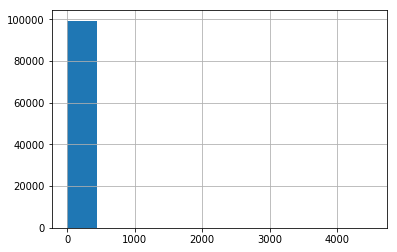

In [8]:
# Ploting histogram
orderdf_trim['delay'].hist()

In [9]:
print("Around ",(((orderdf_trim['delay'].where(orderdf_trim['delay']<24).count())/99441)*100), "% of orders got approve within a day.")
print("Around ",(((orderdf_trim['delay'].where(orderdf_trim['delay']<48).count())/99441)*100), "% of orders got approve two days(delay may be due to weekend or public holiday).")

Around  82.32117537032009 % of orders got approve within a day.
Around  94.64406029706058 % of orders got approve two days(delay may be due to weekend or public holiday).


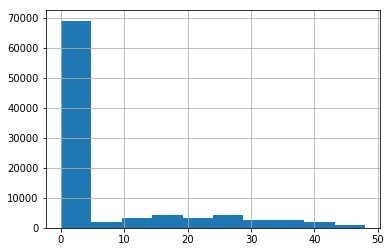

In [10]:
# There are outliers in our data( That a very few orders got very long time for approval)
# ALso we can see in above calculation tha around 95% of order got approval within 48 hours
# So Ploting histogram of order got approved within 48 hours
orderdf_trim['delay'].where(orderdf_trim['delay']<48).hist()

63.78053318047888 % of orders got approve within an hour.


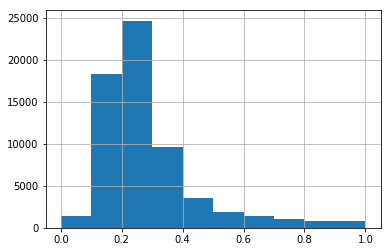

In [11]:
# In above histogram we can see a peak at start means most of the order got approval in short time
print((((orderdf_trim['delay'].where(orderdf_trim['delay']<1).count())/99441)*100), "% of orders got approve within an hour.")
# Histogram of values in an hour
orderdf_trim['delay'].where(orderdf_trim['delay']<1).hist()

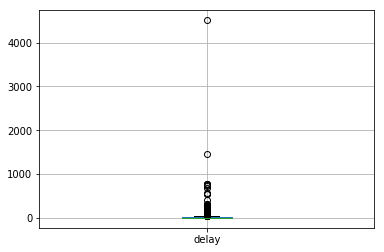

In [12]:
# Ploting Box blot
orderdf_trim.boxplot(column='delay', sym='o', return_type='axes')

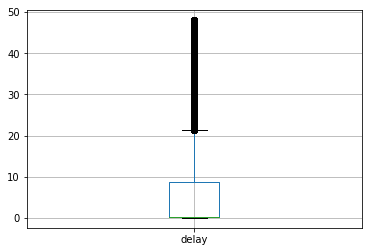

In [13]:
# Ploting box plot by removing extreme value
delay_box = orderdf_trim[orderdf_trim['delay']<48]
delay_box.boxplot(column='delay', sym='o', return_type='axes')

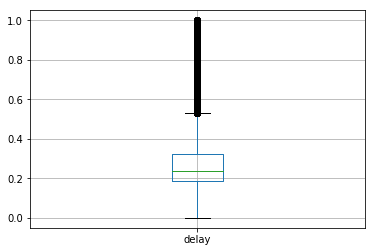

In [14]:
# Still we can see that there are some values outside maximum in box plot.
delay_box = orderdf_trim[orderdf_trim['delay']<1]
delay_box.boxplot(column='delay', sym='o', return_type='axes')

## Explanation of Above Analysis

First we get the difference in order time and approval time, then convert this time in hours.<br>
The mean of the data is around 10 hour whereas **median is 0.343 hour**, showing that data have outliers on higher side. This point is also visible in histogram as well as in box plot.<br>
Around 64 % of ordered are approved within an hour.<br>
Around 82 % of orders got approve within a day.<br>
Around 94 % of orders got approve within two days(delay may be due to weekend or public holiday).
